# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [9]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

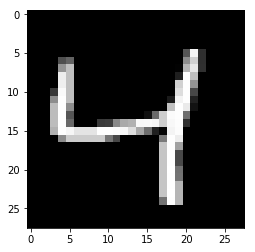

In [11]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

weights = {"input_hidden" : tf.Variable(tf.truncated_normal(shape=[image_size,encoding_dim],mean=0,stddev=0.1)),
           "hidden_output" : tf.Variable(tf.truncated_normal(shape=[encoding_dim,image_size],mean=0,stddev=0.1))}

biases = {"input_hidden" : tf.Variable(tf.truncated_normal(shape=[encoding_dim],mean=0,stddev=0.1)),
           "hidden_output" : tf.Variable(tf.truncated_normal(shape=[image_size],mean=0,stddev=0.1))}

# Output of hidden layer
encoded = tf.matmul(inputs_,weights["input_hidden"]) + biases["input_hidden"]
encoded = tf.nn.relu(encoded)

# Output layer logits
logits = tf.matmul(encoded,weights["hidden_output"]) + biases["hidden_output"]

# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')


# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [18]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),"Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7082
Epoch: 1/20... Training loss: 0.7009
Epoch: 1/20... Training loss: 0.6960
Epoch: 1/20... Training loss: 0.6891
Epoch: 1/20... Training loss: 0.6842
Epoch: 1/20... Training loss: 0.6789
Epoch: 1/20... Training loss: 0.6739
Epoch: 1/20... Training loss: 0.6688
Epoch: 1/20... Training loss: 0.6630
Epoch: 1/20... Training loss: 0.6555
Epoch: 1/20... Training loss: 0.6483
Epoch: 1/20... Training loss: 0.6402
Epoch: 1/20... Training loss: 0.6315
Epoch: 1/20... Training loss: 0.6213
Epoch: 1/20... Training loss: 0.6115
Epoch: 1/20... Training loss: 0.5989
Epoch: 1/20... Training loss: 0.5879
Epoch: 1/20... Training loss: 0.5733
Epoch: 1/20... Training loss: 0.5590
Epoch: 1/20... Training loss: 0.5454
Epoch: 1/20... Training loss: 0.5304
Epoch: 1/20... Training loss: 0.5157
Epoch: 1/20... Training loss: 0.4989
Epoch: 1/20... Training loss: 0.4802
Epoch: 1/20... Training loss: 0.4720
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4398
E

Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1786
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1761
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1773
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1771
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1768
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1750
E

Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1461
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1434
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1479
E

Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1325
E

Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1223
E

Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1159
E

Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1079
E

Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1038
E

Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1006
E

Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0959
E

Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0925
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1000
E

Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0981
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0873
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0882
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

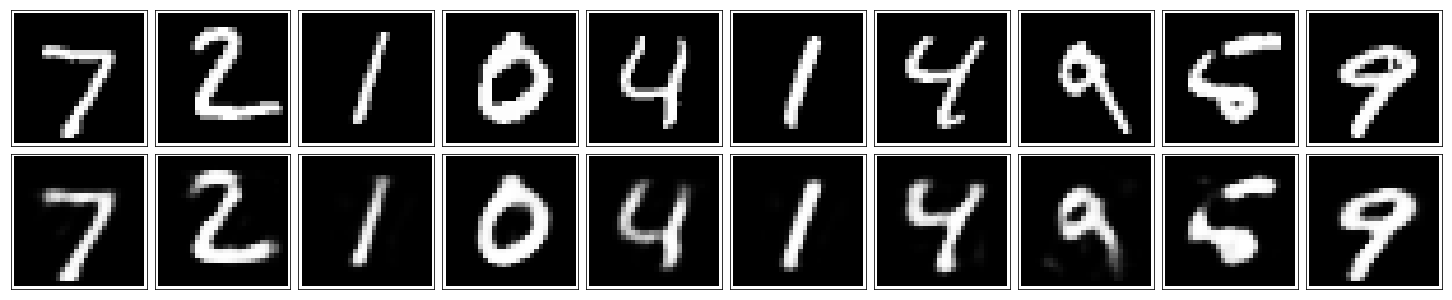

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [21]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.